# **APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de um shopping.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/Mall_Customers.csv',
                    sep=',', encoding='iso-8859-1')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**ATRIBUTOS:**

CustomerID: identificação do cliente.

Genre: Gênero.

Age: idade.

Annual Income (k$):	Rendimento anual.

Spending Score (1 a 100): Pontuação de gastos.

**IDADE**

In [5]:
import plotly.express as px

In [6]:
hist =  px.histogram (df,  x = "Age", nbins=60)
hist.update_layout(width=600,height=400,title_text='Distribuição das idades')
hist.show()

**GÊNERO**

In [7]:
df['Genre'].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [8]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [9]:
import seaborn as sns

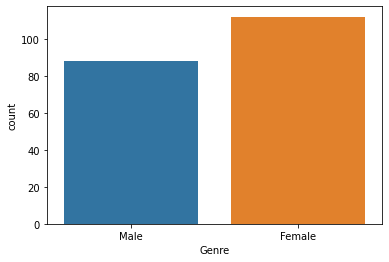

In [ ]:
sns.countplot(x='Genre', data=df);

In [ ]:
df.shape

(200, 5)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [10]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [11]:
df.rename(columns={'CustomerID': 'identificacao'}, inplace=True)

In [12]:
df.rename(columns={'Genre': 'genero'}, inplace=True)
df.rename(columns={'Age': 'idade'}, inplace=True)

In [13]:
df.rename(columns={'Annual Income (k$)': 'rendimento','Spending Score (1-100)':'pontuacao'}, inplace=True)

In [ ]:
df.head(3)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


**Valores Missing (NAN)**

In [14]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

identificacao    0
genero           0
idade            0
rendimento       0
pontuacao        0
dtype: int64

**Análise dos tipos de atributos.**

In [15]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

identificacao     int64
genero           object
idade             int64
rendimento        int64
pontuacao         int64
dtype: object

**Dados Estatísticos**

In [16]:
df.describe()

,identificacao,idade,rendimento,pontuacao
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Análise dos outliers**

In [17]:
import plotly.express as px

In [18]:
boxplot = px.box(df, y="rendimento")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="idade")
boxplot.show()

In [ ]:
boxplot = px.box(df, y="pontuacao")
boxplot.show()

## **PRÉ-PROCESSAMENTO**

In [19]:
df.head(2)

,identificacao,genero,idade,rendimento,pontuacao
0,1,Male,19,15,39
1,2,Male,21,15,81


###**Excluir identificação do cliente**

In [20]:
df2 = df.drop(labels = 'identificacao', axis = 1)

In [21]:
df2.head(2)

,genero,idade,rendimento,pontuacao
0,Male,19,15,39
1,Male,21,15,81


###**Transformar variáveis categóricas em numéricas**

In [22]:
df2['genero'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [23]:
df2.head(3)

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


###**Escalonamento**

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [26]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## **K-MEANS COM DOIS ATRIBUTOS**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [27]:
df2

,genero,idade,rendimento,pontuacao
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [28]:
dados = df2.iloc[:, [2,3]].values

In [29]:
dados

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**Elbow Method**

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

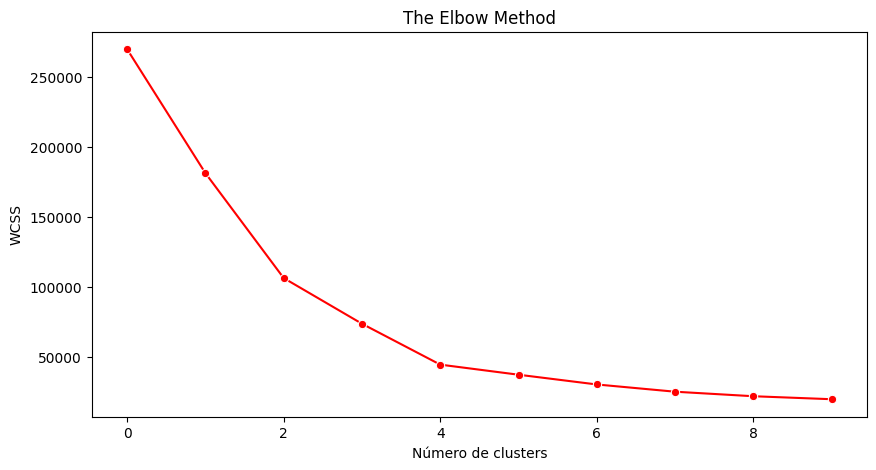

In [32]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans1 = kmeans.fit(dados)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[48.26      , 56.48      ],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [87.        , 18.63157895]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
dados[3,:]

array([16, 77])

In [ ]:
classificacao[3]

0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'Rendimento anual (K$)')
graf3.update_yaxes(title = 'Pontuação')
graf3.show()

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,0
2,2
3,0
4,2
...,...
195,1
196,3
197,1
198,3


In [ ]:
df3 = pd.concat([df, agrupamento],axis=1)
df3

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
df3.iloc[150 , :]

identificacao     151
genero           Male
idade              43
rendimento         78
pontuacao          17
Grupo               3
Name: 150, dtype: object

In [ ]:
df3.loc[df3.identificacao == 92]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
91,92,Male,18,59,41,0


In [ ]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
...,...,...,...,...,...,...
118,119,Female,51,67,43,0
119,120,Female,50,67,57,0
120,121,Male,27,67,56,0
121,122,Female,38,67,40,0


In [ ]:
grupo0.shape

(100, 6)

In [ ]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,identificacao,genero,idade,rendimento,pontuacao,Grupo
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [ ]:
grupo1.shape

(39, 6)

## **K-MEANS COM TODOS ATRIBUTOS**

In [ ]:
df2_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [ ]:
df2_esc.shape

(200, 4)

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

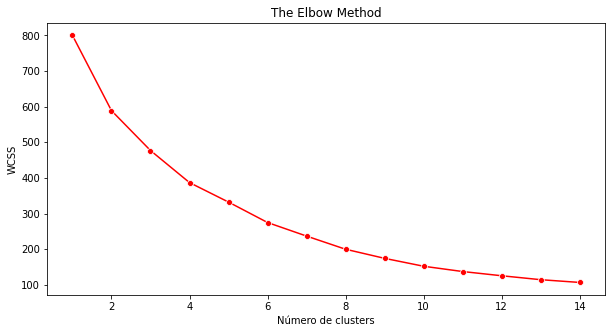

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans2 = kmeans.fit(df2_esc)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[ 1.12815215,  1.22385356, -0.4498575 , -0.44231533],
       [-0.71852548, -0.46169904,  1.09030974,  1.17305816],
       [-0.88640526,  0.86299444, -0.43455895, -0.40762639],
       [-0.88640526, -0.92608124, -0.70017176,  0.28182355],
       [ 0.25517727,  0.0729628 ,  1.14279271, -1.32381522],
       [ 1.12815215, -0.77111419, -0.08465578,  0.8197479 ]])

In [ ]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.00000000e+00, 5.59032258e+01, 4.87741935e+01, 3.88064516e+01],
       [8.33333333e-02, 3.24166667e+01, 8.91250000e+01, 8.04166667e+01],
       [5.55111512e-17, 5.08750000e+01, 4.91750000e+01, 3.97000000e+01],
       [1.66533454e-16, 2.59459459e+01, 4.22162162e+01, 5.74594595e+01],
       [5.66666667e-01, 3.98666667e+01, 9.05000000e+01, 1.61000000e+01],
       [1.00000000e+00, 2.81052632e+01, 5.83421053e+01, 7.13157895e+01]])

In [ ]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 5, 3, 3, 3, 3, 2, 3, 0, 3, 0, 3, 2, 3, 0, 5, 3, 5, 0, 3, 0, 5,
       2, 5, 2, 5, 2, 5, 2, 3, 0, 3, 0, 5, 2, 3, 2, 3, 2, 3, 2, 5, 0, 3,
       2, 3, 2, 3, 3, 3, 2, 5, 3, 0, 2, 0, 2, 0, 3, 0, 0, 5, 2, 2, 0, 5,
       2, 2, 5, 3, 0, 2, 2, 2, 0, 5, 2, 0, 3, 2, 0, 5, 0, 2, 3, 0, 2, 3,
       3, 2, 2, 5, 0, 2, 3, 5, 2, 3, 0, 5, 3, 2, 0, 5, 0, 3, 2, 0, 0, 0,
       0, 3, 2, 5, 3, 3, 2, 2, 2, 2, 5, 2, 1, 5, 3, 1, 0, 5, 0, 5, 4, 5,
       3, 1, 4, 1, 4, 5, 4, 1, 2, 5, 3, 1, 4, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 5, 4, 5, 4, 5, 4, 1,
       4, 5, 4, 5, 4, 1, 4, 1, 4, 5, 4, 5, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [ ]:
classificacao2[199]

1

In [ ]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,5
1,5
2,3
3,3
4,3
...,...
195,1
196,4
197,1
198,4


In [ ]:
df4 = pd.concat([df, agrupamento2],axis=1)
df4

,identificacao,genero,idade,rendimento,pontuacao,Grupo
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [ ]:
df4.iloc[125 , :]

identificacao       126
genero           Female
idade                31
rendimento           70
pontuacao            77
Grupo                 1
Name: 125, dtype: object

In [ ]:
df4.loc[df4.identificacao == 76]

,identificacao,genero,idade,rendimento,pontuacao,Grupo
75,76,Male,26,54,54,5


In [ ]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0

,identificacao,genero,idade,rendimento,pontuacao,Grupo
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
14,15,Male,37,20,13,0
18,19,Male,52,23,29,0
20,21,Male,35,24,35,0
30,31,Male,60,30,4,0
32,33,Male,53,33,4,0
42,43,Male,48,39,36,0
53,54,Male,59,43,60,0
55,56,Male,47,43,41,0


In [ ]:
grupo0.shape

(31, 6)

## **K-MEANS COM PCA**

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

In [ ]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

In [ ]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_pca)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans3 = kmeans.fit(df2_pca)

In [ ]:
# Coordenadas dos Centróides
centroides = kmeans3.cluster_centers_
centroides

In [ ]:
# Classificação dos dados
classificacao3 = kmeans3.labels_
classificacao3

In [ ]:
classificacao3[2]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
graf1 = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao3)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means com PCA')
graf3.update_xaxes(title = 'Componente 1')
graf3.update_yaxes(title = 'Componente 2')
graf3.show()

In [ ]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo'])
agrupamento3

In [ ]:
df5 = pd.concat([df, agrupamento3],axis=1)
df5

In [ ]:
df5.iloc[125 , :]

In [ ]:
df5.loc[df5.identificacao == 76]

In [ ]:
grupo0 = df5.loc[df5.Grupo == 0]
grupo0

In [ ]:
grupo0.shape

## **ALGORITMO HIERÁRQUICO COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
df2.head()

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

**Dendograma**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dendrograma = dendrogram(linkage(df2_pca, method = 'complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao4 = hier.fit_predict(df2_pca)

In [ ]:
classificacao4

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao4)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

**Agrupamento**

In [ ]:
agrupamento4 = pd.DataFrame(classificacao4, columns = ['Grupo'])
agrupamento4

In [ ]:
df6 = pd.concat([df, agrupamento4],axis=1)
df6

In [ ]:
df6.loc[df6.identificacao == 22]

In [ ]:
grupo2 = df6.loc[df6.Grupo == 2]
grupo2

## **ALGORITMO HIERÁRQUICO: todos atributos**






In [ ]:
df2.head()

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Dendograma**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'average'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage = 'average')
classificacao5 = hier.fit_predict(df2_esc)

In [ ]:
classificacao5

**Agrupamento**

In [ ]:
agrupamento5 = pd.DataFrame(classificacao5, columns = ['Grupo'])
agrupamento5

In [ ]:
df7 = pd.concat([df, agrupamento5],axis=1)
df7

In [ ]:
df7.loc[df7.identificacao == 131]

In [ ]:
grupo4 = df7.loc[df7.Grupo == 6]
grupo4.head(2)

In [ ]:
grupo4.shape

## **ALGORITMO DBSCAN COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.32, min_samples=4)
dbscan.fit(df2_pca)

In [ ]:
classificacao6 = dbscan.labels_
classificacao6

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao6)
graf.update_layout(width=800,height=500,title_text='Agrupamento DBSCAN')
graf.show()

**Agrupamento**

In [ ]:
agrupamento6 = pd.DataFrame(classificacao6, columns = ['Grupo'])
agrupamento6

In [ ]:
df8 = pd.concat([df, agrupamento6],axis=1)
df8

In [ ]:
df8.loc[df8.identificacao == 5]

In [ ]:
ruido = df8.loc[df8.Grupo == -1]
ruido

In [ ]:
ruido.shape

## **ALGORITMO DBSCAN: todos atributos**

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps = 0.73, min_samples=4)
dbscan.fit(df2_esc)

In [ ]:
classificacao7 = dbscan.labels_
classificacao7

**Agrupamento**

In [ ]:
agrupamento7 = pd.DataFrame(classificacao7, columns = ['Grupo'])
agrupamento7

In [ ]:
df9 = pd.concat([df, agrupamento7],axis=1)
df9

In [ ]:
df9.loc[df9.identificacao == 127]

In [ ]:
ruido = df9.loc[df9.Grupo == -1]
ruido

In [ ]:
ruido.shape

In [ ]:
grupo = df9.loc[df9.Grupo == 1]
grupo.shape

## **ALGORITMO MEANSHIFT COM PCA**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

In [ ]:
df2_esc

In [ ]:
df2_esc.shape

**Componentes Principais**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
df2_pca = pca.fit_transform(df2_esc)

In [ ]:
df2_pca

**MeanShift**

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
mean = MeanShift(bandwidth=1, cluster_all=True)

In [ ]:
mean.fit(df2_pca)

In [ ]:
classificacao8 = mean.labels_
classificacao8

In [ ]:
import plotly.express as px

In [ ]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao8)
graf.update_layout(width=800,height=500,title_text='Agrupamento MeanShift')
graf.show()

**Agrupamento**

In [ ]:
agrupamento8 = pd.DataFrame(classificacao8, columns = ['Grupo'])
agrupamento8

In [ ]:
df9 = pd.concat([df, agrupamento8],axis=1)
df9

In [ ]:
df9.loc[df9.identificacao == 19]

In [ ]:
ruido = df9.loc[df9.Grupo == -1]
ruido

In [ ]:
grupo = df9.loc[df9.Grupo == 3]
grupo.shape

## **ALGORITMO MEANSHIFT: todos atributos**

In [ ]:
df2_esc

In [ ]:
df2

In [ ]:
df2_esc.shape

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
mean = MeanShift(bandwidth=1.5, cluster_all=True)

In [ ]:
mean.fit(df2_esc)

In [ ]:
classificacao9 = mean.labels_
classificacao9

**Agrupamento**

In [ ]:
agrupamento9 = pd.DataFrame(classificacao9, columns = ['Grupo'])
agrupamento9

In [ ]:
df10 = pd.concat([df, agrupamento9],axis=1)
df10

In [ ]:
df10.loc[df10.identificacao == 45]

In [ ]:
grupo = df10.loc[df10.Grupo == 4]
grupo.shape

## **K-PROTOTYPES**

Algoritmo para agrupamento de dados mistos (categóricos e numéricos). Documentação: https://pypi.org/project/kmodes/

---



In [ ]:
df.head()

In [ ]:
dados= df[['genero','idade','rendimento', 'pontuacao']]
dados

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters= 4)

In [ ]:
kproto1 = kproto.fit_predict(dados, categorical=[0])

In [ ]:
kproto1

In [ ]:
kproto1[4]

In [ ]:
agrupamento = pd.DataFrame(kproto1, columns = ['grupo'])
agrupamento

In [ ]:
df_final = pd.concat([df, agrupamento],axis=1)

In [ ]:
df_final.head()

In [ ]:
df_final.iloc[132 , :]

In [ ]:
grupo = df_final.loc[df_final.grupo ==3]
grupo.head()

In [ ]:
grupo.shape

## **K-MODES**

Algoritmo para agrupamento de dados categóricos. Documentação: https://pypi.org/project/kmodes/

https://www.kaggle.com/datasets/yukeshmarudhasalam/bankmarketing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/bankmarketing.csv',
                    sep=',', encoding='iso-8859-1')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

**Variáveis**

**age** : idade (numérica)

**job** : tipo de trabalho (categorias: 'admin.','blue-collar','entrepreneur(empreendedor)','housemaid','management (gestão)','retired (aposentado)','self-employed (autônomo)','services','student','technician','unemployed (desempregado)','unknown')

**marital** : estado civil (categorias: 'divorced','married','single','unknown'; obs.: 'divorced' significa divorciado ou viúvo (a))

**education**: nível escolar (categorias: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

**default**: inadimplência (categorias: 'no','yes','unknown')

**housing**: crédito de habitação (categorias: 'no','yes','unknown')

**loan**: empréstimo pessoal (categorias: 'no','yes','unknown')

**contact**: contato (categorias: 'cellular','telephone')

**month**: último mês de contato (categorias: 'jan', 'feb', 'mar', 'april', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec')

**day_of_week**: último dia de contato (categorical: 'mon','tue','wed','thu','fri')

**poutcome:** resultado do marketing anterior (categorical: 'failure','nonexistent','success')

In [ ]:
df2 = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df2

In [ ]:
df3 = df2.copy()

In [ ]:
df3['faixa_idade'] = pd.cut(df3['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [ ]:
df3  = df3.drop('age',axis = 1)

In [ ]:
df3.head(30)

In [ ]:
df3.dtypes

In [ ]:
df3.isnull().sum()

### **Pré-processamento**

**Transformação para codificação numérica**

In [ ]:
from sklearn import preprocessing
df4 = df3.apply(preprocessing.LabelEncoder().fit_transform)
df4.head()

### **Instalação**

In [ ]:
pip install kmodes

In [ ]:
from kmodes.kmodes import KModes

In [ ]:
?KModes

### **NÚMERO DE CLUSTERS "IDEAL"**

In [ ]:
custo = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, n_init = 2, verbose=1)
    kmode.fit_predict(df4)
    custo.append(kmode.cost_)

In [ ]:
import matplotlib.pyplot as plt
y = np.array([i for i in range(1,10,1)])
plt.plot(y,custo);

In [ ]:
kmd = KModes(n_clusters=4, verbose=1)
kmd1 = kmd.fit_predict(df4)

In [ ]:
kmd1

In [ ]:
kmd1[40000]

In [ ]:
agrupamento = pd.DataFrame(kmd1, columns = ['grupo'])
agrupamento

In [ ]:
df5 = pd.concat([df2, agrupamento],axis=1)

In [ ]:
df5.head()

In [ ]:
df5.iloc[33284 , :]

In [ ]:
grupo = df5.loc[df5.grupo == 3]
grupo.head()

In [ ]:
grupo.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=df5['job'], order=df5['job'].value_counts().index, hue=df5['grupo'])
plt.show()